<a href="https://colab.research.google.com/github/BingHungLee/BHAI-Daily-Practice/blob/main/%5B20210713%5D_Sales_for_Ice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from pandas.plotting import scatter_matrix

In [2]:
!git clone https://github.com/BingHungLee/Dataset.git

fatal: destination path 'Dataset' already exists and is not an empty directory.


In [3]:
cd /content/Dataset

/content/Dataset


In [4]:
Dta= pd.read_csv("ice_train.csv")
Dta.head(5)

,Sales,Temp,Weather
0,242,25,Rainy
1,245,27,Sunny
2,251,30,Rainy
3,248,29,Sunny
4,249,28,Sunny


In [5]:
Dta.columns

Index(['Sales', 'Temp', 'Weather'], dtype='object')

In [6]:
Dta.shape

(15, 3)

In [7]:
Dta.dtypes

Sales       int64
Temp        int64
Weather    object
dtype: object

## Basic Statstic Data

In [8]:
# Basic Statstic Data
print(Dta.mean())
print("------------------------------------------")  
print(Dta.median())
print("------------------------------------------")  
print(Dta.describe())

Sales    246.933333
Temp      27.600000
dtype: float64
------------------------------------------
Sales    249.0
Temp      29.0
dtype: float64
------------------------------------------
            Sales       Temp
count   15.000000  15.000000
mean   246.933333  27.600000
std      8.180697   4.532423
min    229.000000  18.000000
25%    243.500000  26.000000
50%    249.000000  29.000000
75%    252.500000  30.500000
max    257.000000  34.000000


In [9]:
print(pd.value_counts(Dta.Weather))

Sunny    8
Rainy    7
Name: Weather, dtype: int64


In [10]:
group_weather=Dta.groupby('Weather')
print(group_weather)
print(group_weather['Sales'].mean())

Weather
Rainy    242.571429
Sunny    250.750000
Name: Sales, dtype: float64


##　Data Visualize 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2a15b3fd0>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

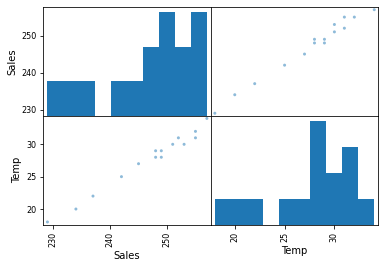

In [11]:
# Visualize 
fig =plt.figure() # plt frame
scatter_matrix(Dta[['Sales','Temp','Weather']])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


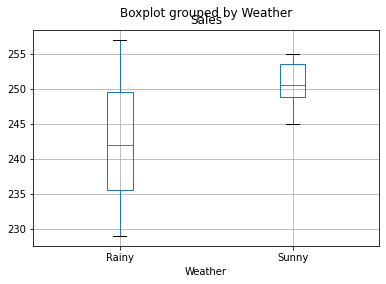

In [12]:
bp=Dta.boxplot(column=['Sales'],by='Weather')

## Handle Dummy Variables

In [13]:
Dta

,Sales,Temp,Weather
0,242,25,Rainy
1,245,27,Sunny
2,251,30,Rainy
3,248,29,Sunny
4,249,28,Sunny
5,229,18,Rainy
6,252,31,Sunny
7,255,32,Sunny
8,234,20,Rainy
9,237,22,Rainy


In [14]:
X=Dta[['Temp','Weather']]
X

,Temp,Weather
0,25,Rainy
1,27,Sunny
2,30,Rainy
3,29,Sunny
4,28,Sunny
5,18,Rainy
6,31,Sunny
7,32,Sunny
8,20,Rainy
9,22,Rainy


In [15]:
X = pd.concat([X, pd.get_dummies(X['Weather'])],axis =1)
X

,Temp,Weather,Rainy,Sunny
0,25,Rainy,1,0
1,27,Sunny,0,1
2,30,Rainy,1,0
3,29,Sunny,0,1
4,28,Sunny,0,1
5,18,Rainy,1,0
6,31,Sunny,0,1
7,32,Sunny,0,1
8,20,Rainy,1,0
9,22,Rainy,1,0


In [16]:
X = X.drop(columns=['Weather'])
X

,Temp,Rainy,Sunny
0,25,1,0
1,27,0,1
2,30,1,0
3,29,0,1
4,28,0,1
5,18,1,0
6,31,0,1
7,32,0,1
8,20,1,0
9,22,1,0


In [17]:
X[['Temp']]

,Temp
0,25
1,27
2,30
3,29
4,28
5,18
6,31
7,32
8,20
9,22


In [18]:
Y=Dta[['Sales']]
Y

,Sales
0,242
1,245
2,251
3,248
4,249
5,229
6,252
7,255
8,234
9,237


## Linear Regression Model Applied

In [19]:
reg_model1 = linear_model.LinearRegression()
reg_model1.fit(X[['Temp']],Y)
print(reg_model1.intercept_)
print(reg_model1.coef_)

[197.54891052]
[[1.78929068]]


In [20]:
reg_model2 = linear_model.LinearRegression()
reg_model2.fit(X,Y)
print(reg_model2.intercept_)
print(reg_model2.coef_)

# means: Y = 198.38+1.758X1+0.274D1-0.274D2

[198.3831457]
[[ 1.7584025  -0.27418029  0.27418029]]


## Model Validation Inside Test

In [21]:
rmse = np.sqrt(np.mean((reg_model2.predict(X)-Y)**2))
mae = np.mean(abs(reg_model2.predict(X)-Y))
mape = np.mean(abs((reg_model2.predict(X)-Y)/Y))*100 #%

print("rmse :", rmse)
print("mae :", mae)
print("mape :", mape)

rmse : Sales    1.010483
dtype: float64
mae : Sales    0.843718
dtype: float64
mape : Sales    0.339917
dtype: float64


## View Figure

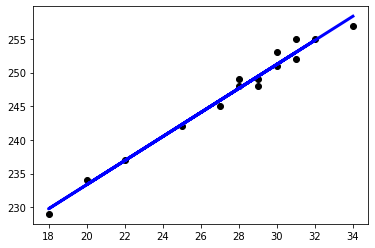

In [22]:
plt.scatter(X[['Temp']],Y, color='black')
plt.plot(X[['Temp']],reg_model1.predict(X[['Temp']]),color='blue',linewidth=3)
plt.xlable=('Temp')
plt.ylabel=("Sales")
plt.show()

## Model Predict

In [23]:
NewX1 = 33
NewX2 = 'Sunny'
NewX = pd.concat([pd.DataFrame([NewX1]),pd.DataFrame([NewX2])],axis=1)
NewX.columns=['Temp','Weather']
NewX
NewX = pd.concat([NewX, pd.get_dummies(NewX['Weather'])],axis=1)
NewX = NewX.drop(columns=['Weather'])

In [24]:
idx,=np.where(np.isin(X.columns,NewX.columns,invert=True))
idx,

(array([1]),)

In [25]:
colName=X.columns[idx].values.tolist()
colName

['Rainy']

In [26]:
for x in range(len(colName)):
  NewX[colName[x]]=np.repeat(0,NewX.shape[0])
NewX[colName[x]]

0    0
Name: Rainy, dtype: int64

In [27]:
NewX = NewX.reindex(X.columns, axis=1)
NewX

,Temp,Rainy,Sunny
0,33,0,1


In [28]:
PredY= reg_model2.predict(NewX)
print(PredY)

[[256.68460843]]
